# EWMCOV

In [1]:
if (!require("arrow")) {
    install.packages("arrow");
    library(arrow);
}

Loading required package: arrow


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp




In [2]:
first_year = 2008; last_year = 2020;

# read the equity_indices
df = read_parquet('./data/equity_indices.parquet')

In [3]:
df = df[df$Datetime >= "2008-01-01" & df$Datetime <= "2020-12-31 23:59:59",];

In [4]:
head(df)

,DY,ES,EW,FX,MX,NQ,RTY,X,YM,Datetime
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2231,0,0,0,0,0,0,0,0,0.0018232415,2008-01-01 14:00:00
2232,0,0,0,0,0,0,0,0,-0.0003831418,2008-01-01 15:00:00
2233,0,0,0,0,0,0,0,0,0.0006707551,2008-01-01 16:00:00
2234,0,0,0,0,0,0,0,0,-0.0008618213,2008-01-01 17:00:00
2235,0,0,0,0,0,0,0,0,-0.0018209699,2008-01-01 18:00:00
2236,0,0,0,0,0,0,0,0,-0.0012481997,2008-01-01 19:00:00


In [5]:
tail(df)

,DY,ES,EW,FX,MX,NQ,RTY,X,YM,Datetime
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
81766,0,-0.0010771509,0.0002614949,0,0,-0.0035443728,-0.0003043677,0,0.0000331686,2020-12-31 06:00:00
81767,0,0.0014152851,0.0018299856,0,0,0.0017784900,0.0003044603,0,0.0011276949,2020-12-31 07:00:00
81768,0,-0.0003364964,-0.0006523725,0,0,-0.0007023294,-0.0006087354,0,-0.0003975616,2020-12-31 08:00:00
81769,0,0.0028948431,0.0021324745,0,0,0.0020303776,0.0018273184,0,0.0031154713,2020-12-31 09:00:00
81770,0,0.0028193596,-0.0021713641,0,0,0.0021821299,-0.0012159903,0,0.0029405934,2020-12-31 10:00:00
81771,0,0.0011379610,0.0027853941,0,0,0.0010303667,0.0020798458,0,0.0004612090,2020-12-31 11:00:00


In [6]:
dim(df)

[1] 79541    10

In [7]:
source("xpca.R")

In [8]:
means_covs = ewmcov(alpha=.9305, df[,1:9]);
means = means_covs$means;
covs = means_covs$covs;

In [9]:
length(covs)

[1] 79541

In [10]:
covs[79541]

3.398465e-07,1.786185e-07,4.137540e-07,2.680921e-07,1.738534e-07,2.234197e-08,4.598730e-07,1.777065e-07,2.027165e-07
1.786185e-07,1.327126e-06,5.232913e-07,1.574462e-07,4.458096e-07,1.147890e-06,8.849842e-07,8.199537e-07,1.230983e-06
4.137540e-07,5.232913e-07,4.680776e-06,3.633307e-07,-2.977985e-07,5.406052e-07,4.803346e-06,2.333393e-07,5.544413e-07
2.680921e-07,1.574462e-07,3.633307e-07,2.881826e-07,2.104064e-07,4.161843e-08,3.825550e-07,2.210555e-07,1.897774e-07
1.738534e-07,4.458096e-07,-2.977985e-07,2.104064e-07,1.996204e-06,1.743750e-07,6.398446e-07,1.457051e-06,3.846789e-07
2.234197e-08,1.147890e-06,5.406052e-07,4.161843e-08,1.743750e-07,1.646111e-06,8.276487e-07,3.254155e-07,8.785211e-07
4.598730e-07,8.849842e-07,4.803346e-06,3.825550e-07,6.398446e-07,8.276487e-07,6.294577e-06,1.187305e-06,8.855686e-07
1.777065e-07,8.199537e-07,2.333393e-07,2.210555e-07,1.457051e-06,3.254155e-07,1.187305e-06,3.277732e-06,6.640397e-07
2.027165e-07,1.230983e-06,5.544413e-07,1.897774e-07,3.846789e-07,8.785211e-07,8.855686e-07,6.640397e-07,1.352310e-06


In [11]:
df[79541,1:9]

,DY,ES,EW,FX,MX,NQ,RTY,X,YM
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
81771,0,0.001137961,0.002785394,0,0,0.001030367,0.002079846,0,0.000461209


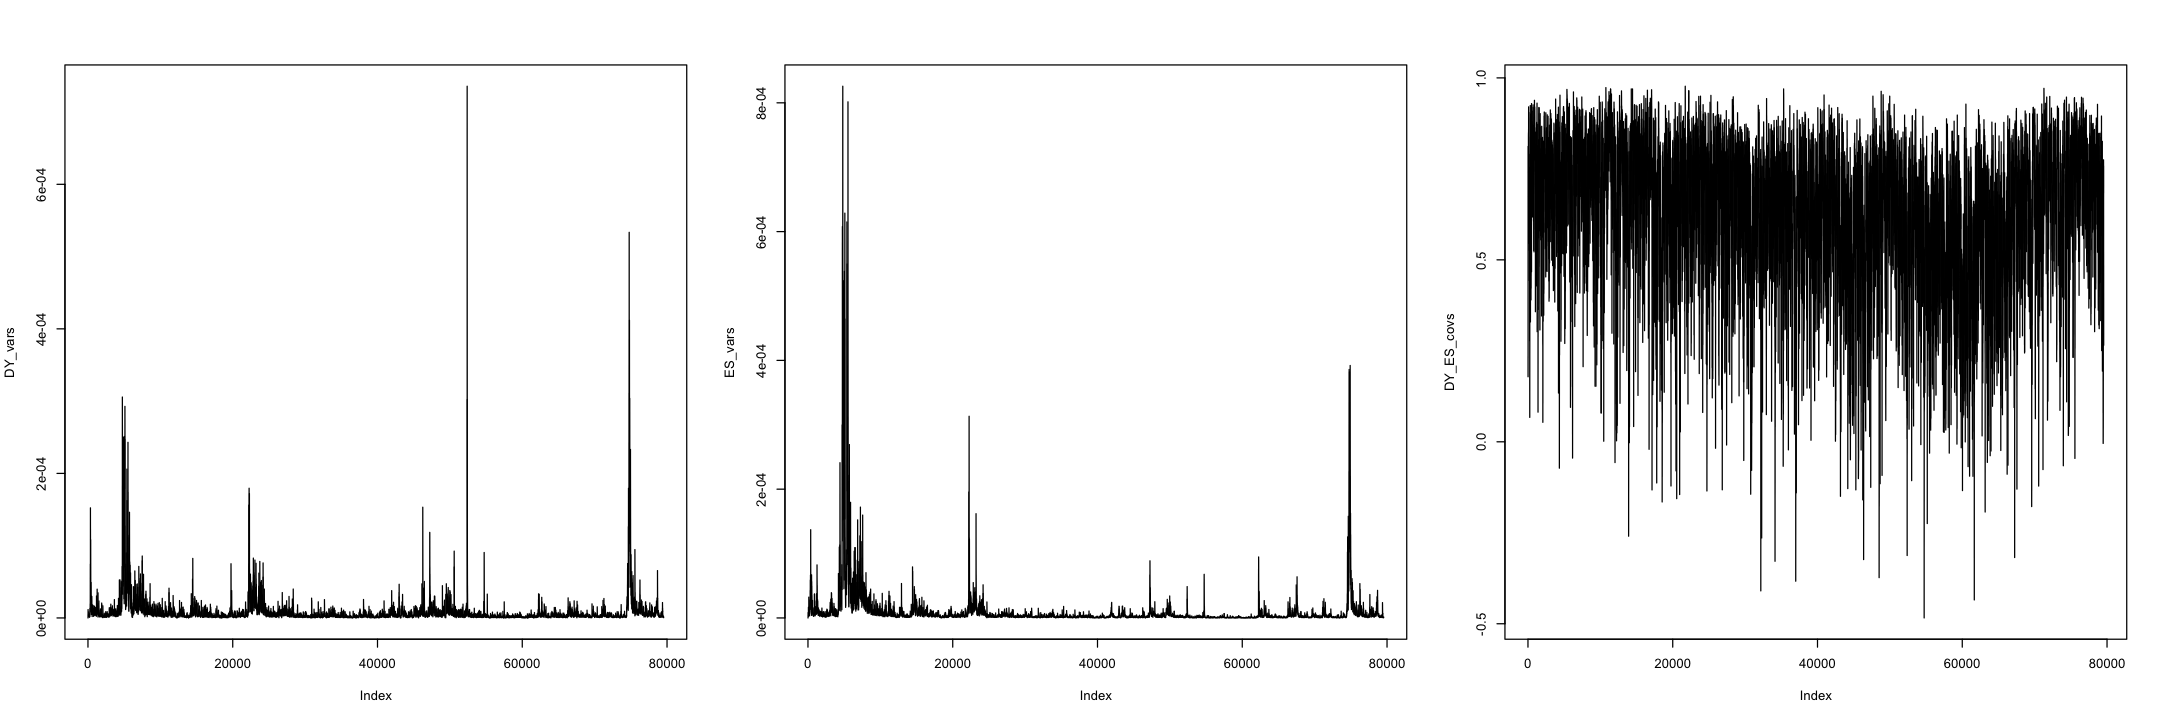

In [16]:
options(repr.plot.width=18, repr.plot.height=6)
par(mfrow=c(1,3));
DY_index = 1;
ES_index = 2;
DY_vars = rep(0, length(covs));
ES_vars = rep(0, length(covs));
DY_ES_covs = rep(0, length(covs));
for (i in 1: length(covs)) {
    S = covs[[i]]
    DY_vars[i] =  S[DY_index, DY_index];
    ES_vars[i] =  S[ES_index, ES_index];
    DY_ES_covs[i] =  S[DY_index, ES_index] / (sqrt(DY_vars[i] * ES_vars[i]));
}
plot(DY_vars, type="l");
plot(ES_vars, type="l");
plot(DY_ES_covs, type="l");

In [13]:
sample_cov = cov(df[,1:9]);
sample_cov

,DY,ES,EW,FX,MX,NQ,RTY,X,YM
DY,9.005733e-06,6.325644e-06,6.056717e-06,1.516605e-05,1.405343e-05,5.358800e-06,6.941103e-06,9.155795e-06,6.372305e-06
ES,6.325644e-06,9.991907e-06,9.180807e-06,1.252373e-05,1.235017e-05,8.176476e-06,1.051316e-05,1.031918e-05,9.962928e-06
EW,6.056717e-06,9.180807e-06,1.126842e-05,1.177640e-05,1.159532e-05,7.631681e-06,1.124375e-05,9.642090e-06,9.189728e-06
FX,1.516605e-05,1.252373e-05,1.177640e-05,3.139362e-05,3.025122e-05,9.920009e-06,1.362219e-05,1.877063e-05,1.261630e-05
MX,1.405343e-05,1.235017e-05,1.159532e-05,3.025122e-05,3.347048e-05,9.599591e-06,1.353142e-05,1.908563e-05,1.246700e-05
NQ,5.358800e-06,8.176476e-06,7.631681e-06,9.920009e-06,9.599591e-06,8.158238e-06,8.866435e-06,8.069238e-06,8.028577e-06
RTY,6.941103e-06,1.051316e-05,1.124375e-05,1.362219e-05,1.353142e-05,8.866435e-06,1.459975e-05,1.111532e-05,1.051541e-05
X,9.155795e-06,1.031918e-05,9.642090e-06,1.877063e-05,1.908563e-05,8.069238e-06,1.111532e-05,2.171174e-05,1.044042e-05
YM,6.372305e-06,9.962928e-06,9.189728e-06,1.261630e-05,1.246700e-05,8.028577e-06,1.051541e-05,1.044042e-05,1.046581e-05


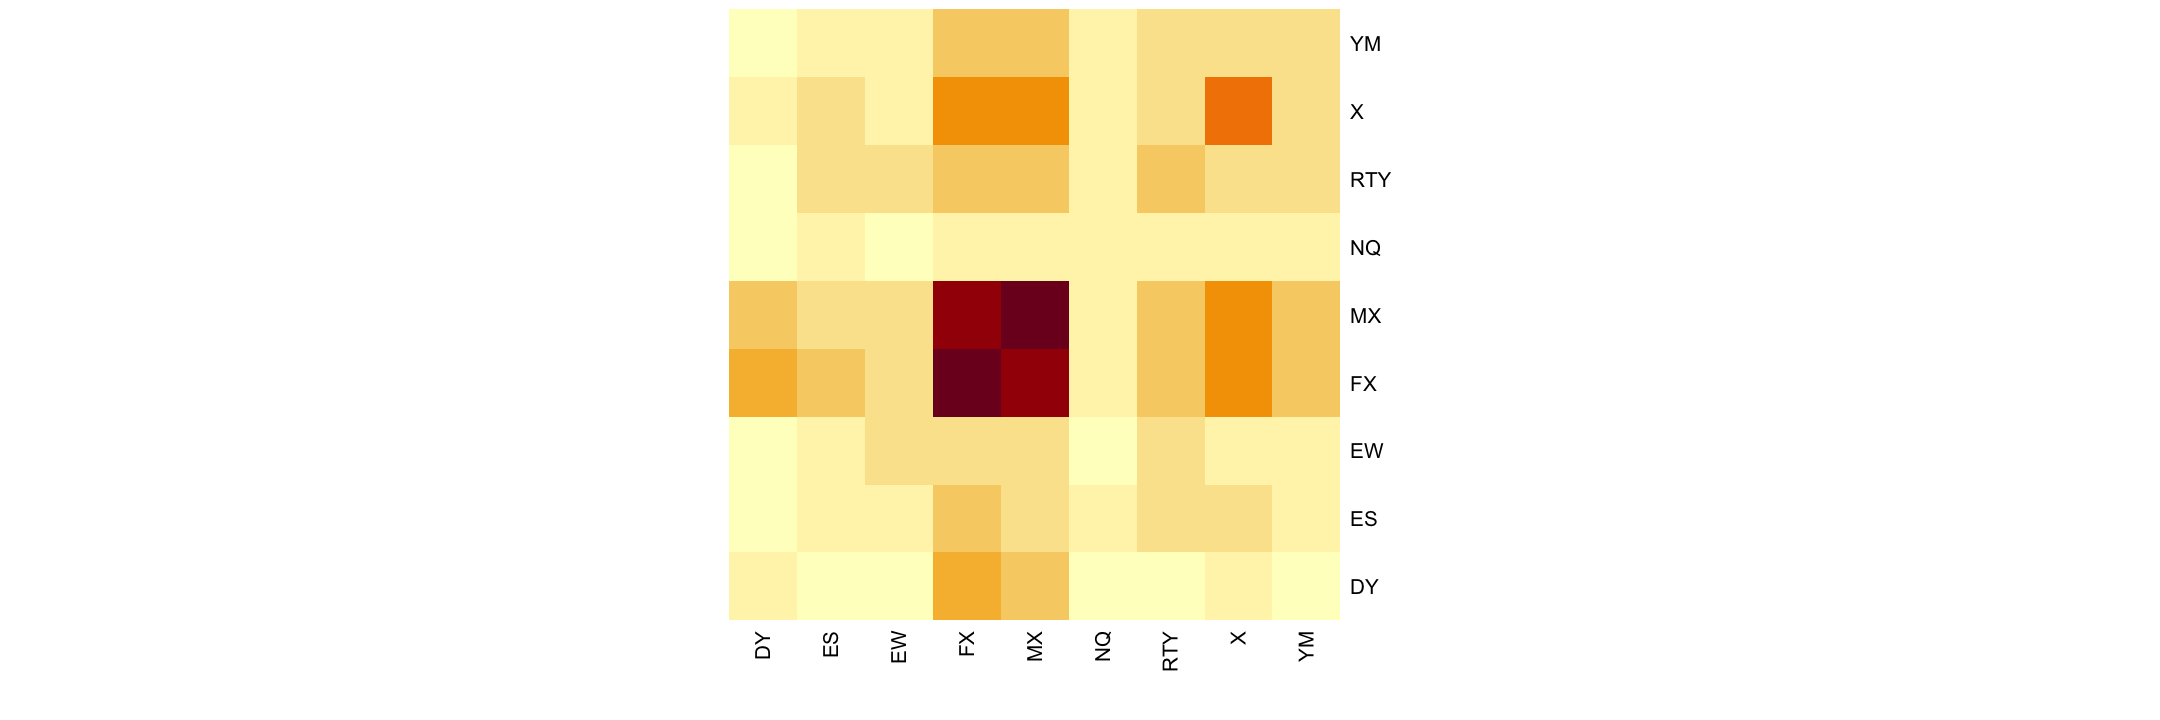

In [14]:
options(repr.plot.width=18, repr.plot.height=6)
par(mfrow=c(1,3));
heatmap(sample_cov, Colv = NA, Rowv = NA, symm = TRUE)

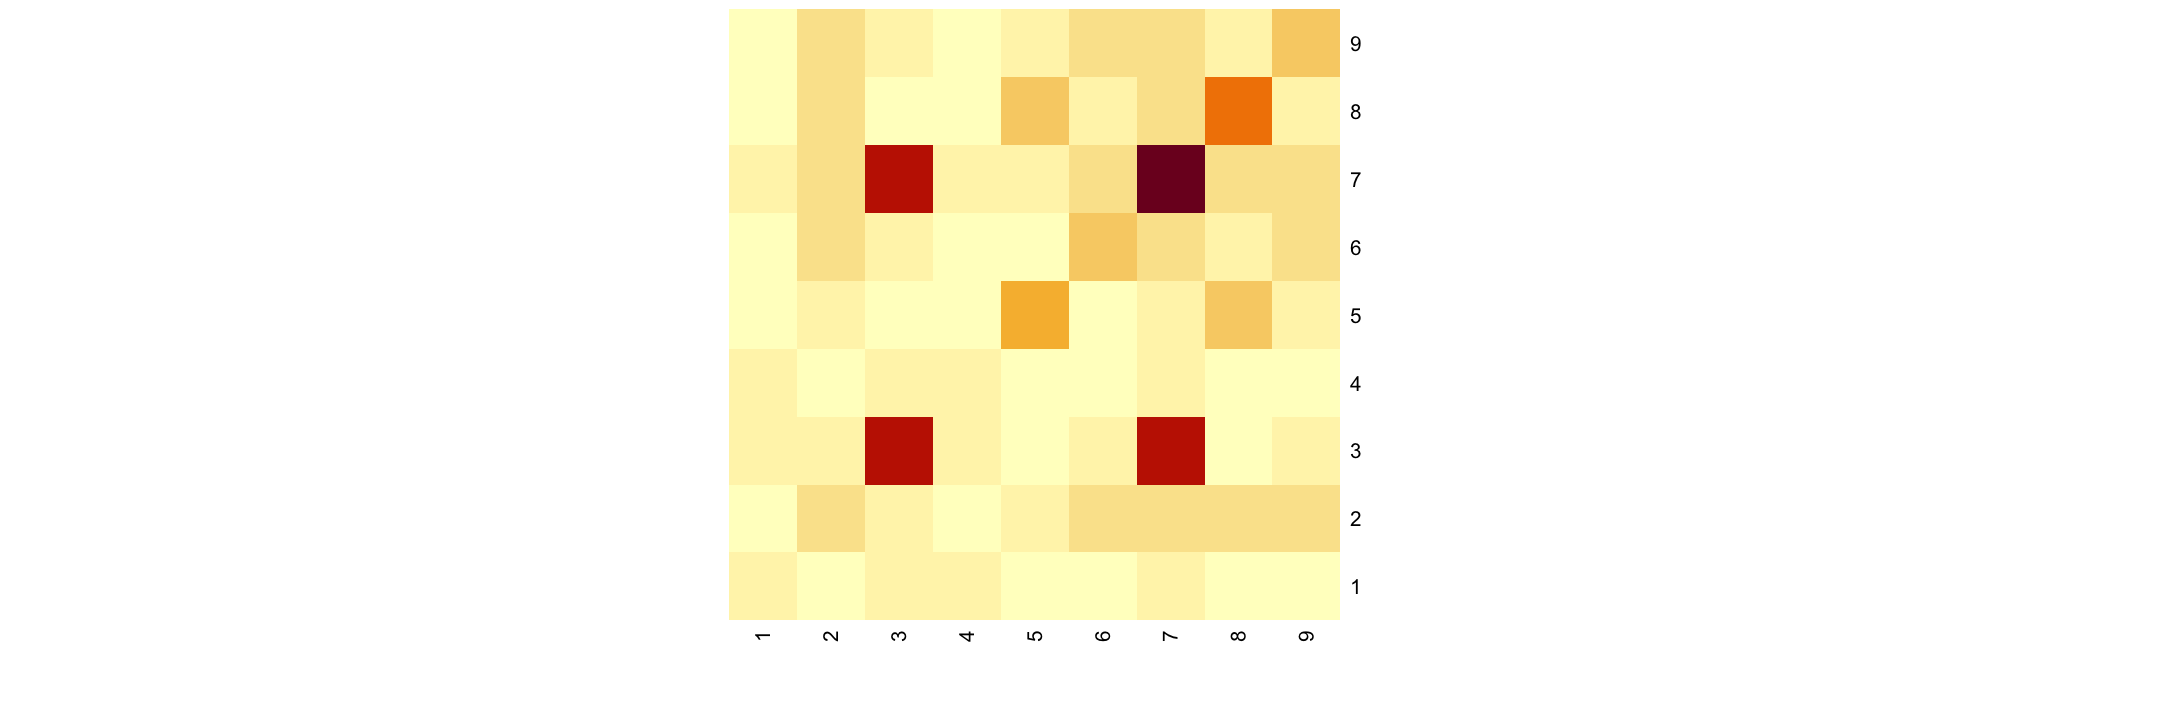

In [15]:
heatmap(covs[[length(covs)]], Colv = NA, Rowv = NA, symm = TRUE)